<a href="https://colab.research.google.com/github/mehmetsom/SocialMediaBehavior/blob/main/SocialMediaBehavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# User Behavior Analysis for Optimizing Engagement on Social Media
# Mehmet Huseyin Somuncu

In [1]:
# --- Visualization Libraries ---
import plotly.graph_objects as go  # Plotly for advanced visualizations
from plotly.subplots import make_subplots  # For creating subplots
import plotly.express as px  # Fast plotting with Plotly Express
import seaborn as sns  # For statistical graphics

# --- Data Processing Libraries ---
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.preprocessing import LabelEncoder  # For converting categorical data into numerical format
import statsmodels.api as sm  # For statistical models

# --- Data Transformation and Similarity ---
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding categorical variables
from sklearn.preprocessing import StandardScaler  # For data standardization
from sklearn.metrics.pairwise import cosine_similarity  # For calculating cosine similarity

# --- Clustering ---
from sklearn.cluster import KMeans  # For K-Means clustering algorithm

# --- Date and Time ---
from datetime import datetime  # For working with dates and times

# --- Warnings Handling ---
import warnings
warnings.filterwarnings('ignore')  # To ignore warnings

# Data **Preprocessing**

In [17]:
df = pd.read_csv('Dataset.csv')
df.head()

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela


In [18]:
df.describe()

,UserID
count,100000.000000
mean,50000.500000
std,28867.657797
min,1.000000
25%,25000.750000
50%,50000.500000
75%,75000.250000
max,100000.000000


In [9]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DOB                   5 non-null      datetime64[ns]
 1   Gender                5 non-null      object        
 2   City                  5 non-null      object        
 3   Age                   5 non-null      int32         
 4   Monthly_Activity      5 non-null      int64         
 5   Avg_Session_Duration  5 non-null      float64       
 6   Posts_Engaged         5 non-null      int64         
 7   Cluster               5 non-null      int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(2)
memory usage: 412.0+ bytes
DOB                     0
Gender                  0
City                    0
Age                     0
Monthly_Activity        0
Avg_Session_Duration    0
Posts_Engaged           0
Cluster                 0
dtype: int64


In [8]:
print(df[['User uuid', 'Likes', 'Days passed from post', 'Likes Score'
,'Type'
,'Numer of Tags'
,'Numer of Comments'
,'Date Posted'
,'Year'
,'Month'
,'Day'
,'Hour'
,'Minute'     ]].describe())

           User uuid         Likes  Days passed from post    Likes Score  \
count  178922.000000  1.789220e+05          178922.000000  178922.000000   
mean      546.316948  4.298806e+04             447.477510       0.270961   
std       317.200142  2.604648e+05             492.620418       0.210007   
min         1.000000  0.000000e+00               0.000000       0.000000   
25%       273.000000  1.340000e+02             107.000000       0.100000   
50%       540.000000  1.064000e+03             260.000000       0.220000   
75%       829.000000  1.074300e+04             612.000000       0.390000   
max      1089.000000  1.544569e+07            3775.000000       1.000000   

       Numer of Tags  Numer of Comments           Year          Month  \
count  178922.000000       1.789220e+05  178922.000000  178922.000000   
mean        3.578045       5.622285e+02    2019.412107       6.764814   
std         6.877008       1.201380e+04       1.374731       3.753390   
min         0.000000   

In [23]:
df.head(5)

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela


In [24]:
df.isnull().sum()


,0
UserID,0
Name,0
Gender,0
DOB,0
Interests,0
City,0
Country,0


In [26]:
print(df[[ 'Name', 'Gender', 'DOB', 'Interests', 'City', 'Country']].describe())

              Name  Gender         DOB  Interests         City        Country
count       100000  100000      100000     100000       100000         100000
unique       92580       2       18536      53737        24452            244
top     John Smith    Male  2002-11-22  'Fashion'  Springfield  United States
freq            21   50069          17       1371           37          12311


In [2]:
import pandas as pd  # Make sure pandas is imported correctly
import numpy as np
from datetime import datetime
# Step 1: Create a DataFrame with some missing values
df = pd.DataFrame({
    'Name': ['John', 'Anna', 'Peter', 'Linda', None],
    'DOB': ['1990-01-01', '1995-05-16', '1992-03-08', '1990-07-25', '1988-02-12'],
    'City': ['New York', 'Los Angeles', None, 'Chicago', 'Miami']
})

# Add random 'Monthly_Activity' values and introduce NaNs
df['Monthly_Activity'] = np.random.randint(5, 50, size=len(df))
df.loc[::10, 'Monthly_Activity'] = np.nan  # Introduce NaN values

# Step 2: Handle missing data
df['Monthly_Activity'] = df['Monthly_Activity'].fillna(df['Monthly_Activity'].mean())  # Fill NaNs with mean
df['City'] = df['City'].fillna(df['City'].mode()[0])  # Fill NaNs with the mode (most frequent value)
df = df.dropna(subset=['Name'])  # Drop rows where 'Name' is NaN
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')  # Convert DOB to datetime, invalid dates will be NaT
df['Age'] = datetime.now().year - df['DOB'].dt.year  # Calculate age based on DOB

# Fill NaNs in 'Monthly_Activity' based on the mean activity per age group
df['Monthly_Activity'] = df.groupby('Age')['Monthly_Activity'].transform(lambda x: x.fillna(x.mean()))

# Step 3: Verify Cleaned Data
print("\nAfter Handling Missing Data:")
print(df.isnull().sum())  # Check for missing values in each column
print(df.head())  # Display the first few rows of the cleaned DataFrame


After Handling Missing Data:
Name                0
DOB                 0
City                0
Monthly_Activity    0
Age                 0
dtype: int64
    Name        DOB         City  Monthly_Activity  Age
0   John 1990-01-01     New York              30.5   35
1   Anna 1995-05-16  Los Angeles              43.0   30
2  Peter 1992-03-08      Chicago              13.0   33
3  Linda 1990-07-25      Chicago              28.0   35


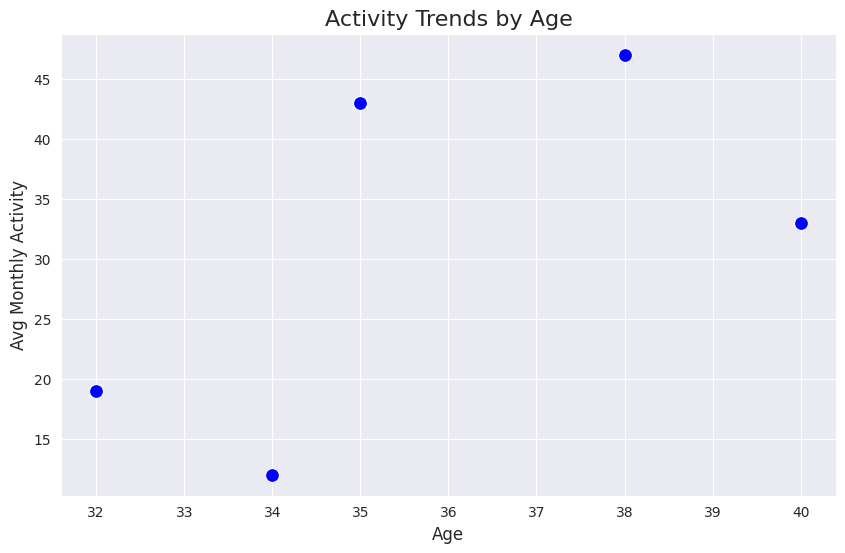

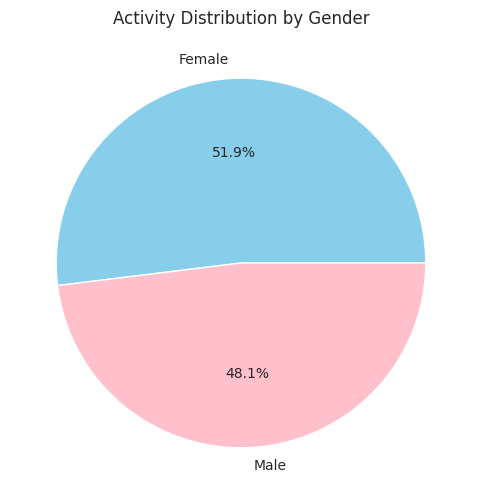

<ipython-input-10-868ff6c91a31>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_activity, x='City', y='Monthly_Activity', palette='pastel', edgecolor='black')


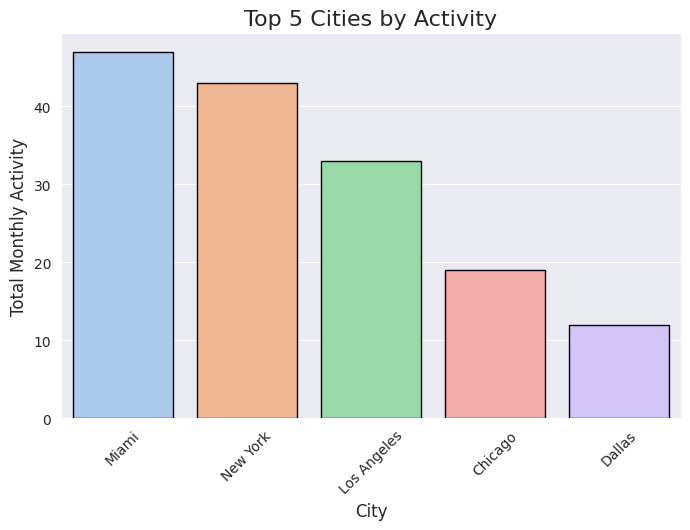

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Set theme for plots
sns.set_style("darkgrid")  # Options: "whitegrid", "dark", "white", "ticks"

# Simulated user data
user_data = {
    'DOB': ['1990-01-01', '1985-05-16', '1993-03-08', '1987-07-25', '1991-02-12'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Miami', 'Dallas']
}

df = pd.DataFrame(user_data)

# Calculate age based on DOB
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
current_year = datetime.now().year
df['Age'] = current_year - df['DOB'].dt.year

# Generate random user activity data
np.random.seed(42)
df['Monthly_Activity'] = np.random.randint(5, 50, size=len(df))

# Activity trends by age (Scatter Plot)
age_activity = df.groupby('Age')['Monthly_Activity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_activity, x='Age', y='Monthly_Activity', color='blue', s=100)
plt.title('Activity Trends by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Avg Monthly Activity', fontsize=12)
plt.grid(True)
plt.show()

# Activity distribution by gender (Pie Chart)
gender_activity = df.groupby('Gender')['Monthly_Activity'].sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(gender_activity['Monthly_Activity'], labels=gender_activity['Gender'], autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Activity Distribution by Gender')
plt.show()

# Top 5 cities by activity (Pastel Bar Chart)
city_activity = df.groupby('City')['Monthly_Activity'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=city_activity, x='City', y='Monthly_Activity', palette='pastel', edgecolor='black')
plt.title('Top 5 Cities by Activity', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Monthly Activity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

                       DOB        Age  Monthly_Activity
count                    5   5.000000          5.000000
mean   1989-06-12 09:36:00  35.800000         30.800000
min    1985-05-16 00:00:00  32.000000         12.000000
25%    1987-07-25 00:00:00  34.000000         19.000000
50%    1990-01-01 00:00:00  35.000000         33.000000
75%    1991-02-12 00:00:00  38.000000         43.000000
max    1993-03-08 00:00:00  40.000000         47.000000
std                    NaN   3.193744         15.073155


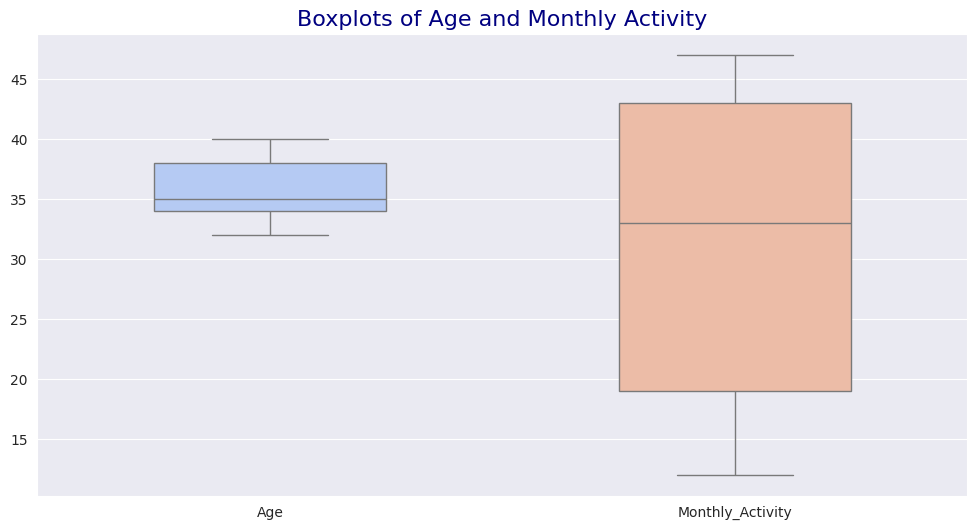


Outliers in Age:
Empty DataFrame
Columns: [DOB, Gender, City, Age, Monthly_Activity]
Index: []

Outliers in Monthly Activity:
Empty DataFrame
Columns: [DOB, Gender, City, Age, Monthly_Activity]
Index: []

Correlation Matrix:
                        Age  Monthly_Activity
Age               1.000000          0.590987
Monthly_Activity  0.590987          1.000000


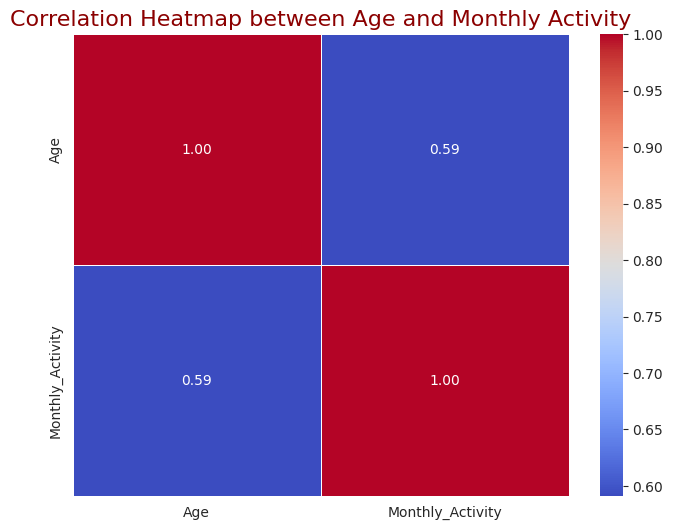

In [11]:
# Statistical Analysis and Outlier Detection on Data

# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Summary Statistics
# Display summary statistics for numerical columns
print(df.describe())

# Step 2: Visualizing Outliers with Boxplots
# Creating a boxplot to identify outliers in 'Age' and 'Monthly_Activity'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Monthly_Activity']], palette='coolwarm', width=0.5)
plt.title('Boxplots of Age and Monthly Activity', fontsize=16, color='navy')  # Title with color
plt.show()

# Step 3: Outlier Detection using IQR (Interquartile Range)
# Function to identify outliers using IQR method
def detect_outliers_iqr(data):
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Identify outliers that fall outside the threshold of 1.5 * IQR
    outliers = df[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    return outliers

# Applying the outlier detection function on 'Age' and 'Monthly_Activity'
outliers_in_age = detect_outliers_iqr(df['Age'])
outliers_in_activity = detect_outliers_iqr(df['Monthly_Activity'])

# Printing detected outliers
print("\nOutliers in Age:")
print(outliers_in_age)
print("\nOutliers in Monthly Activity:")
print(outliers_in_activity)

# Step 4: Correlation Analysis
# Calculating correlation matrix between 'Age' and 'Monthly_Activity'
correlation_matrix = df[['Age', 'Monthly_Activity']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Colorful heatmap with annotation
plt.title('Correlation Heatmap between Age and Monthly Activity', fontsize=16, color='darkred')  # Title with color
plt.show()

# Step 5: Additional Analysis (Optional)
# You can further explore using:
# - Z-score based outlier detection
# - Histograms and density plots for distributions
# - Statistical tests (e.g., t-tests, ANOVA) to compare different groups

Summary Statistics:
                       DOB        Age  Monthly_Activity
count                    5   5.000000          5.000000
mean   1989-06-12 09:36:00  35.800000         30.800000
min    1985-05-16 00:00:00  32.000000         12.000000
25%    1987-07-25 00:00:00  34.000000         19.000000
50%    1990-01-01 00:00:00  35.000000         33.000000
75%    1991-02-12 00:00:00  38.000000         43.000000
max    1993-03-08 00:00:00  40.000000         47.000000
std                    NaN   3.193744         15.073155

Outliers Detected:
Empty DataFrame
Columns: [DOB, Gender, City, Age, Monthly_Activity]
Index: []


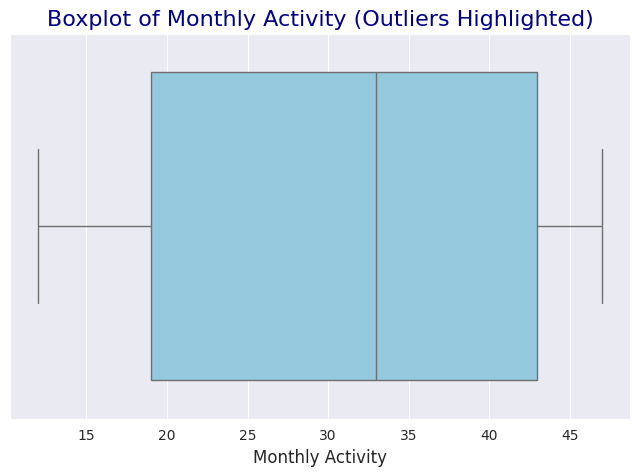

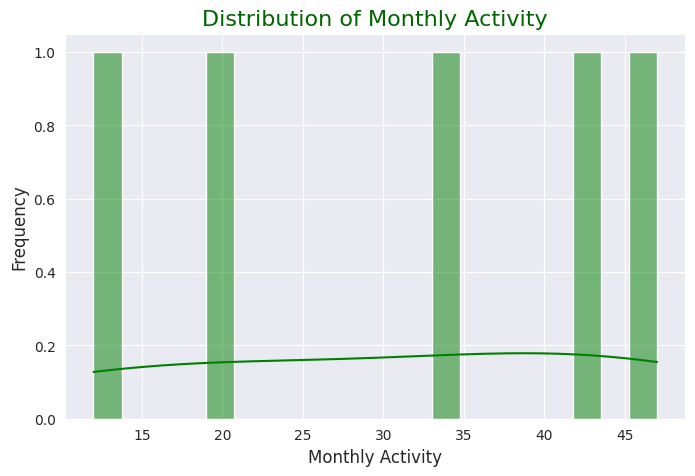


Correlation Between Age and Monthly Activity:
                       Age  Monthly_Activity
Age               1.000000          0.590987
Monthly_Activity  0.590987          1.000000


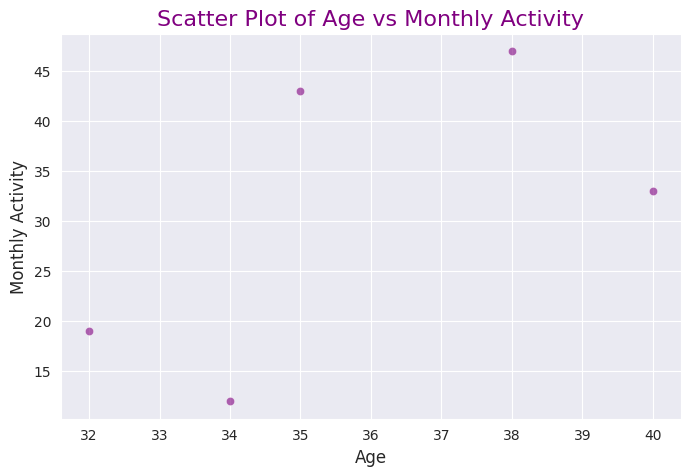

In [12]:
# Data Preprocessing and Analysis of Monthly Activity

# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Step 0: Data Preprocessing
# Simulating 'Monthly_Activity' column and converting 'DOB' to datetime format
np.random.seed(42)
df['Monthly_Activity'] = np.random.randint(5, 50, size=len(df))  # Simulated activity data
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')  # Handle invalid dates
df['Age'] = datetime.now().year - df['DOB'].dt.year  # Calculate age based on birthdate

# Step 1: Summary Statistics
# Display summary statistics for the DataFrame
print("Summary Statistics:")
print(df.describe())

# Step 2: Detecting Outliers Using the IQR Method
# Calculate the Interquartile Range (IQR) for detecting outliers
Q1 = df['Monthly_Activity'].quantile(0.25)
Q3 = df['Monthly_Activity'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Monthly_Activity'] < lower_bound) | (df['Monthly_Activity'] > upper_bound)]
print("\nOutliers Detected:")
print(outliers)

# Step 3: Visualizing Patterns and Outliers
# Boxplot to visualize outliers in the 'Monthly_Activity' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Monthly_Activity', color='skyblue')
plt.title('Boxplot of Monthly Activity (Outliers Highlighted)', fontsize=16, color='darkblue')
plt.xlabel('Monthly Activity', fontsize=12)
plt.show()

# Distribution plot to observe the pattern and distribution of 'Monthly_Activity'
plt.figure(figsize=(8, 5))
sns.histplot(df['Monthly_Activity'], bins=20, kde=True, color='green')
plt.title('Distribution of Monthly Activity', fontsize=16, color='darkgreen')
plt.xlabel('Monthly Activity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Step 4: Correlation Analysis
# Calculate correlation between 'Age' and 'Monthly_Activity'
correlation = df[['Age', 'Monthly_Activity']].corr()
print("\nCorrelation Between Age and Monthly Activity:")
print(correlation)

# Visualize correlation between Age and Monthly Activity using a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Monthly_Activity', color='purple', alpha=0.6)
plt.title('Scatter Plot of Age vs Monthly Activity', fontsize=16, color='purple')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Monthly Activity', fontsize=12)
plt.show()


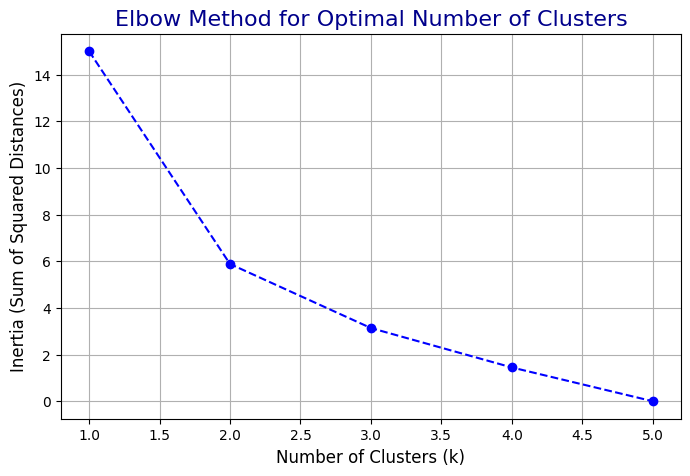

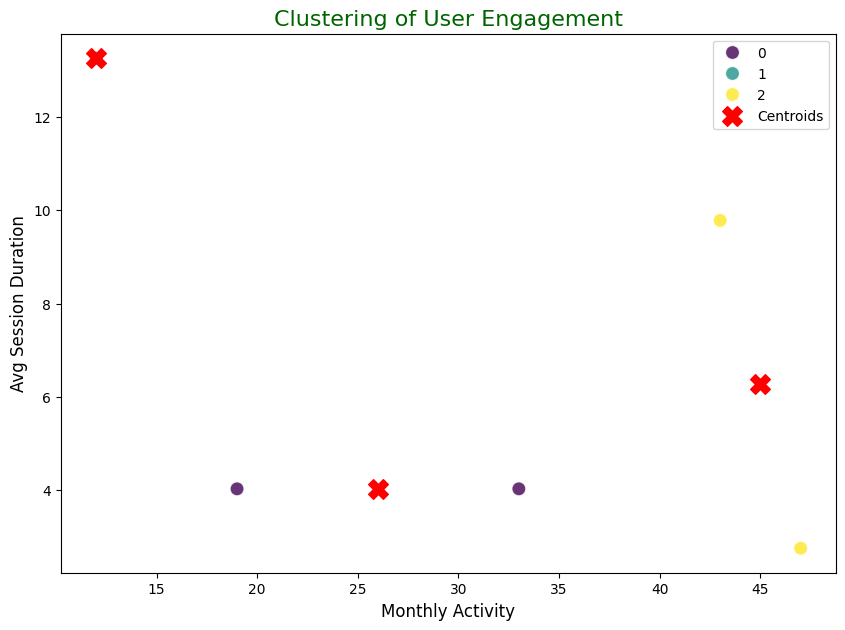


Cluster Summary:
         Monthly_Activity  Avg_Session_Duration  Posts_Engaged
Cluster                                                       
0                    26.0              4.028086            5.5
1                    12.0             13.260290           12.0
2                    45.0              6.268824            3.0


In [8]:
# Data Preprocessing, Feature Selection, and Clustering

# Importing necessary libraries

# Step 0: Data Preprocessing
# Simulating engagement features: Monthly Activity, Avg Session Duration, Posts Engaged
np.random.seed(42)
df['Monthly_Activity'] = np.random.randint(5, 50, size=len(df))  # Simulated activity
df['Avg_Session_Duration'] = np.random.uniform(2, 15, size=len(df))  # Simulated session duration
df['Posts_Engaged'] = np.random.randint(1, 20, size=len(df))  # Simulated number of posts interacted with

# Step 1: Feature Selection for Clustering
# Selecting the features that will be used for clustering
clustering_features = df[['Monthly_Activity', 'Avg_Session_Duration', 'Posts_Engaged']]

# Step 2: Standardizing the Data
# Standardize features to have mean = 0 and variance = 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Step 3: Determine Optimal Number of Clusters Using Elbow Method
# Inertia calculation for different values of k to find optimal k
inertia = []
k_range = range(1, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', color='blue', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16, color='darkblue')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid(True)
plt.show()

# Step 4: Apply K-Means Clustering with Optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Analyze and Visualize the Clusters
# Adding cluster centroids for visualization
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=clustering_features.columns)

# Plotting the Clusters with Centroids
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Monthly_Activity', y='Avg_Session_Duration', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.scatter(centroid_df['Monthly_Activity'], centroid_df['Avg_Session_Duration'], s=200, c='red', marker='X', label='Centroids')
plt.title('Clustering of User Engagement', fontsize=16, color='darkgreen')
plt.xlabel('Monthly Activity', fontsize=12)
plt.ylabel('Avg Session Duration', fontsize=12)
plt.legend()
plt.show()

# Step 6: Summary Statistics for Each Cluster
# Displaying the mean statistics for each cluster
cluster_summary = df.groupby('Cluster')[['Monthly_Activity', 'Avg_Session_Duration', 'Posts_Engaged']].mean()
print("\nCluster Summary:")
print(cluster_summary)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Random Forest Accuracy: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


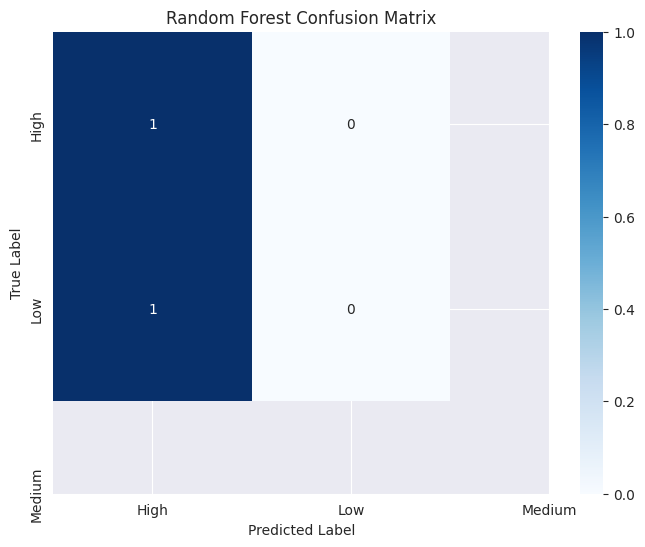

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate additional features if not available in the dataset
np.random.seed(42)
df['Monthly_Activity'] = np.random.randint(5, 50, size=len(df))  # Simulated activity
df['Avg_Session_Duration'] = np.random.uniform(2, 15, size=len(df))  # Simulated session duration
df['Posts_Engaged'] = np.random.randint(1, 20, size=len(df))  # Simulated posts interacted

# Simulate a target variable for classification
# Example: Categorize users into low, medium, high engagement based on Monthly_Activity
df['Engagement_Level'] = pd.cut(
    df['Monthly_Activity'], bins=[0, 15, 30, 50], labels=['Low', 'Medium', 'High']
)

# Encode the target variable
label_encoder = LabelEncoder()
df['Engagement_Label'] = label_encoder.fit_transform(df['Engagement_Level'])

# Select features and target
X = df[['Monthly_Activity', 'Avg_Session_Duration', 'Posts_Engaged']]
y = df['Engagement_Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

SVM Accuracy: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


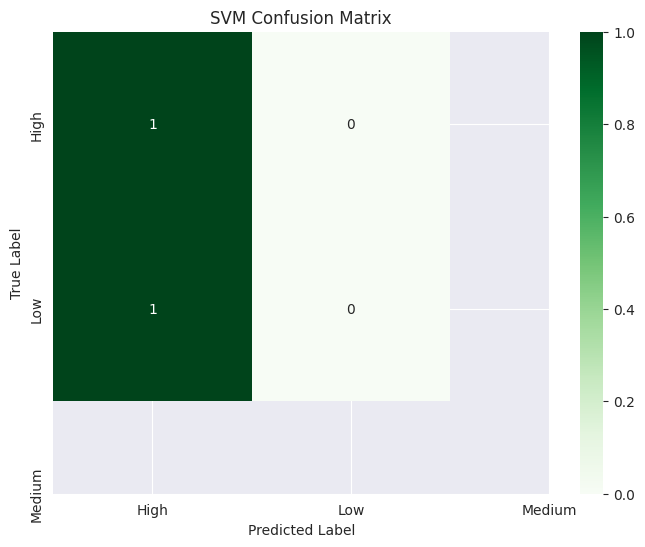

In [22]:
# 2. Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Evaluate SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(



Random Forest Evaluation:
Accuracy: 0.5000
Robustness (Cross-Validation Mean): 0.2500
Training Time: 0.2372 seconds
Prediction Time: 0.0125 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Feature Importances: [0.36940299 0.33955224 0.29104478]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


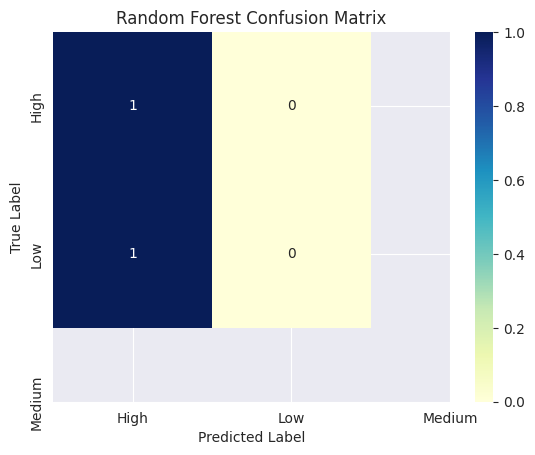

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 2.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, 


SVM Evaluation:
Accuracy: 0.5000
Robustness (Cross-Validation Mean): nan
Training Time: 0.0076 seconds
Prediction Time: 0.0005 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



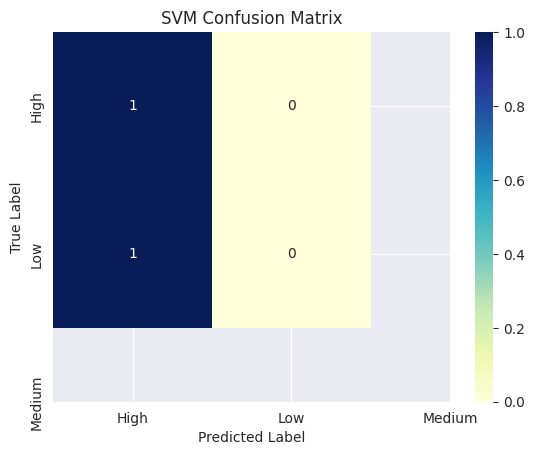

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Measure training and prediction speed
    start_time_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time_train

    start_time_predict = time.time()
    predictions = model.predict(X_test)
    predict_time = time.time() - start_time_predict

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Evaluate robustness using StratifiedKFold cross-validation
    # Use n_splits = 2 or 3 if you have very few samples
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # 2 splits for a small dataset
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf)
    robustness = cv_scores.mean() if len(cv_scores) > 0 else 0.0  # Avoid empty array errors

    # Confusion matrix
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print evaluation metrics
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Robustness (Cross-Validation Mean): {robustness:.4f}")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Prediction Time: {predict_time:.4f} seconds")
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Interpretability (for Random Forest)
    if model_name == "Random Forest":
        feature_importances = model.feature_importances_
        print(f"Feature Importances: {feature_importances}")

    # Display confusion matrix
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Example usage with small dataset
# Assuming you have defined X_train, X_test, y_train, y_test, and label_encoder

# Evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# Evaluate SVM
svm_model = SVC(kernel='rbf', random_state=42)
evaluate_model(svm_model, X_train, X_test, y_train, y_test, "SVM")
